In [2]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(\
                                                             num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (sample x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (sample x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [4]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.6718 - acc: 0.5796 - val_loss: 0.5891 - val_acc: 0.6896
Epoch 2/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.5036 - acc: 0.7677 - val_loss: 0.5064 - val_acc: 0.7570
Epoch 3/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.3362 - acc: 0.8641 - val_loss: 0.4091 - val_acc: 0.8258
Epoch 4/10
20000/20000 [==============================] - 23s 1ms/step - loss: 0.2350 - acc: 0.9101 - val_loss: 0.5361 - val_acc: 0.7964
Epoch 5/10
20000/20000 [==============================] - 21s 1ms/step - loss: 0.1775 - acc: 0.9337 - val_loss: 0.5203 - val_acc: 0.7904
Epoch 6/10
20000/20000 [==============================] - 22s 1ms/step - loss: 0.1329 - acc: 0.9521 - val_loss: 0.4734 - val_acc: 0.8168
Epoch 7/10
20000/20000 [==========

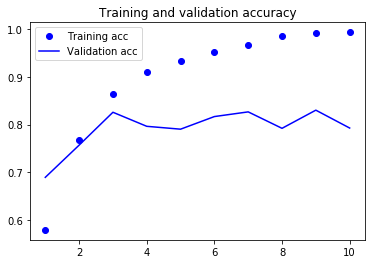

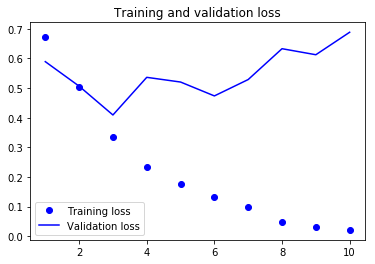

In [7]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [8]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.5314 - acc: 0.7445 - val_loss: 0.3709 - val_acc: 0.8416
Epoch 2/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2986 - acc: 0.8827 - val_loss: 0.3182 - val_acc: 0.8792
Epoch 3/10
20000/20000 [==============================] - 53s 3ms/step - loss: 0.2398 - acc: 0.9091 - val_loss: 0.2870 - val_acc: 0.8832
Epoch 4/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.2068 - acc: 0.9255 - val_loss: 0.3030 - val_acc: 0.8788
Epoch 5/10
20000/20000 [==============================] - 57s 3ms/step - loss: 0.1791 - acc: 0.9351 - val_loss: 0.3016 - val_acc: 0.8852
Epoch 6/10
20000/20000 [==============================] - 55s 3ms/step - loss: 0.1608 - acc: 0.9416 - val_loss: 0.3403 - val_acc: 0.8844
Epoch 7/10
20000/20000 [==============================] - 60s 3ms/step - loss: 0.1479 - acc: 0.9480 - val_loss: 0.4854 - val_acc:

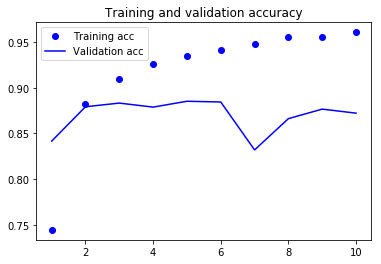

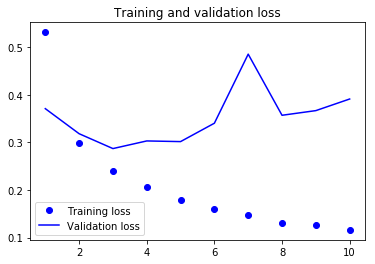

In [9]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()